In [ ]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from iminuit import Minuit
import matplotlib.cm as cm
from scipy.optimize import curve_fit
import inspect
import bened as ben

ModuleNotFoundError: No module named 'benedetta'

In [2]:
prova = uproot.open('/Users/Utente/Desktop/uni/MAGISTRALE/LNL/data/beam_5_0_MeV_600_kHz_20241114_165400_digi0.root')
prova.keys()
prova['rawdata;32'].keys()
samples32 = np.array(prova['rawdata;32']['samples'].array())
canale2 = samples32[:, 3, :100]
bsl2 = np.mean(canale2, axis=1)

C:\Users\Utente\AppData\Local\Temp\ipykernel_11500\4283487881.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  samples32 = np.array(prova['rawdata;32']['samples'].array())


In [3]:
bsl2.max()

np.float64(15717.01)

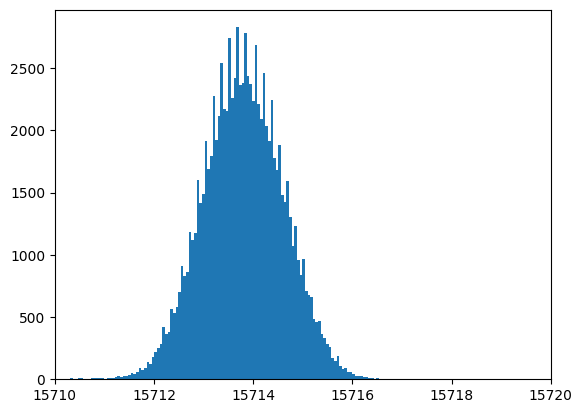

In [4]:
plt.hist(bsl2, bins=13000)
plt.xlim(15710, 15720)
plt.show()

Parametri ottimizzati:
-----------------------------------------------
-----------------------------------------------
Ampiezza = 13492.395615515472 ± 7.354195118262741
Media = 15713.793310511284 ± 0.0005111343385979591
Sigma = 0.8121210573903127 ± 0.0005111356018206337
Chi-quadro = nan
Chi-quadro ridotto = nan


c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gamma\benedetta.py:73: RuntimeWarning: divide by zero encountered in divide
  chi_quadro = np.sum(((counts_fit - fit_values) / sigma_counts_fit) ** 2)
c:\Users\Utente\Desktop\uni\MAGISTRALE\ESAMI\laboratory1\lab\gamma\benedetta.py:73: RuntimeWarning: invalid value encountered in divide
  chi_quadro = np.sum(((counts_fit - fit_values) / sigma_counts_fit) ** 2)


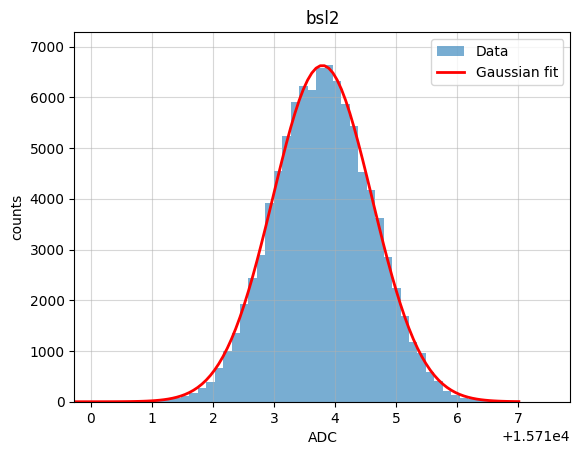

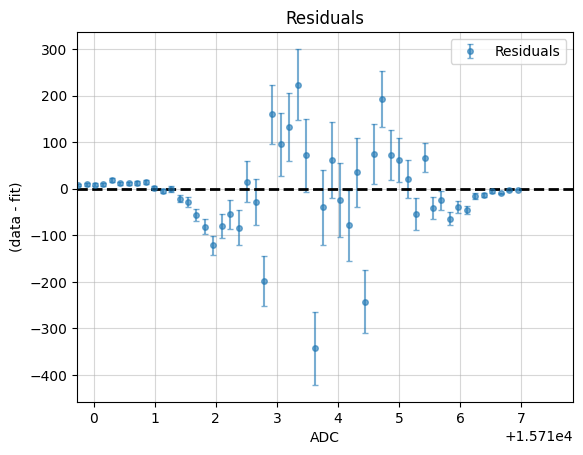

In [5]:
speranza = ben.normal(bsl2, 'ADC', 'counts', 'bsl2', b=5000)

In [2]:
t_data1 = np.array(np.loadtxt('C:\\Users\\Utente\\Desktop\\uni\\MAGISTRALE\\ESAMI\\laboratory1\\lab\\vespa\\valvola_chiusa.txt', delimiter='\t', usecols=0))
p_data1 = np.array(np.loadtxt('C:\\Users\\Utente\\Desktop\\uni\\MAGISTRALE\\ESAMI\\laboratory1\\lab\\vespa\\valvola_chiusa.txt', delimiter='\t', usecols=1))
p_err1 = np.array(np.loadtxt('C:\\Users\\Utente\\Desktop\\uni\\MAGISTRALE\\ESAMI\\laboratory1\\lab\\vespa\\valvola_chiusa.txt', delimiter='\t', usecols=2))

Parametri ottimizzati:
-----------------------------------------------
-----------------------------------------------
Inclinazione (m) = 8.203185987806571e-07 ± 3.3010947095593244e-09
Intercetta (q) = 3.21506562762077e-05 ± 3.5209679219889953e-07
Chi-squared $\chi^2$ = 558.307200911367
Reduced chi-squared $\chi^2_r$ = 17.447100028480218


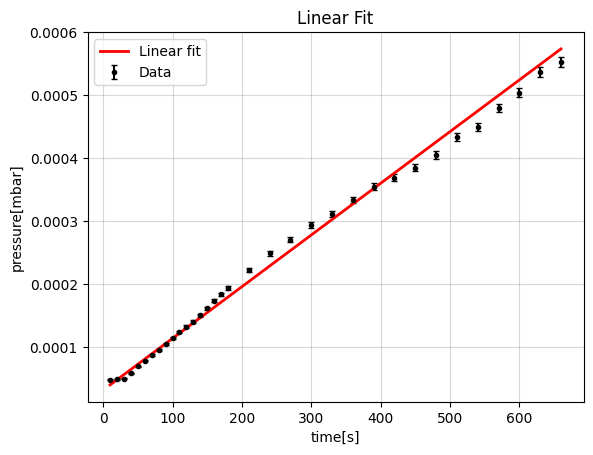

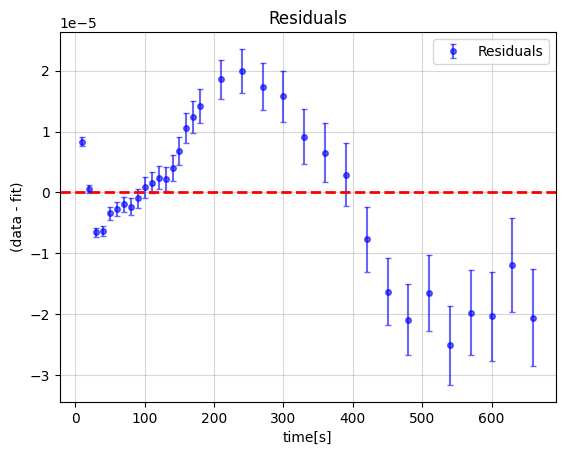

In [3]:
speranza2 = ben.linear_regression(t_data1, p_data1, 0, p_err1, 'time[s]', 'pressure[mbar]')

In [14]:
speranza2[4]

np.float64(17.447100028480218)